# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load and Preview Data

In [76]:
df = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_04_Resume Project_Price Prediction\avocado.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Check Missing Values

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Drop Non-relevant Columns

In [77]:
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'], axis=1)

In [78]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Define Custom Functions

In [13]:
def get_avarage(df, column):
    return sum(df[column]) / len(df)

In [14]:
def get_avarge_between_two_columns(df, column1, column2):
    
    List = list(df[column1].unique())
    average=[]
    
    for i in List:
        x = df[df[column1] == i]
        column1_average = get_avarage(x, column2)
        average.append(column1_average)
    
    df_column1_column2 = pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index = df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data = df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [53]:
def plot(data, xlabel, ylabel):
    plt.figure(figsize = (15,5))
    ax = sns.barplot(x=data.column1, y=data.column2, hue=data.column1, palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend = False
    plt.title( ('Average ' + ylabel + ' of Avocado According to ' + xlabel) );

# Q: Which regions have lowest and highest prices?

In [16]:
data1 = get_avarge_between_two_columns(df, 'region', 'AveragePrice')

In [27]:
data1.shape

(54, 2)

In [28]:
data1

,column1,column2
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


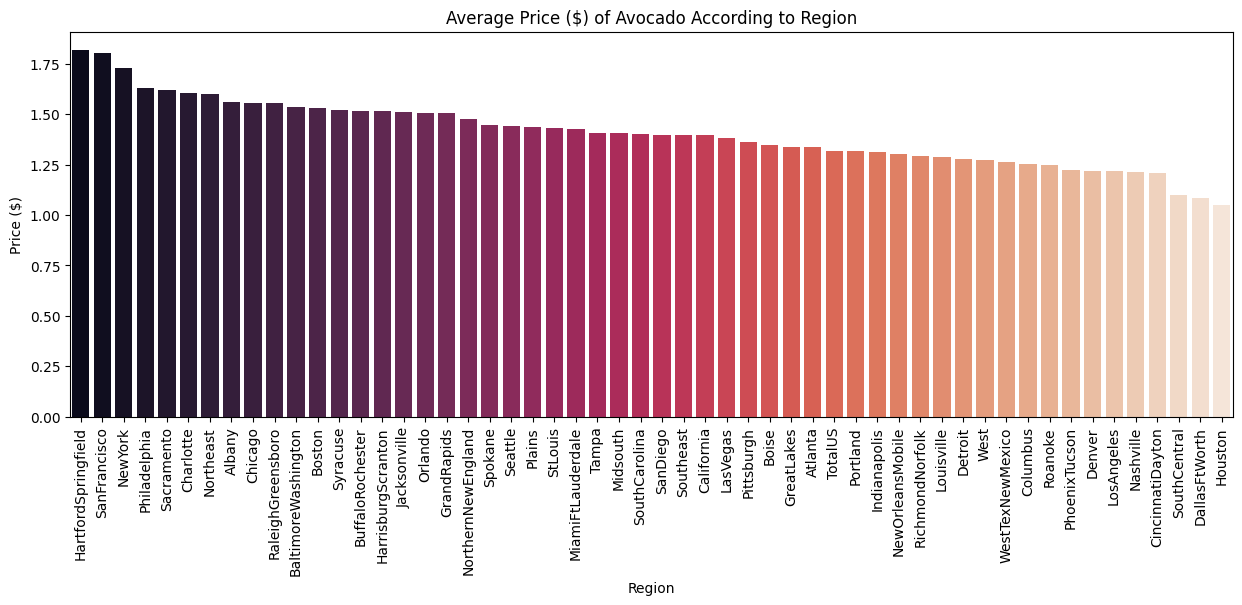

In [54]:
plot(data1, 'Region', 'Price ($)')

In [30]:
print( data1['column1'].iloc[-1], 'is the region producing avocado with the lowest price' )

Houston is the region producing avocado with the lowest price


# Q: Which region have highest production?

**Check Outliers**

In [31]:
data2 = get_avarge_between_two_columns(df, 'region', 'Total Volume')

In [32]:
data2.shape

(54, 2)

In [33]:
data2

,column1,column2
51,TotalUS,1.735130e+07
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06
15,GreatLakes,1.744505e+06
25,Midsouth,1.503992e+06
22,LosAngeles,1.502653e+06
35,Plains,9.206761e+05


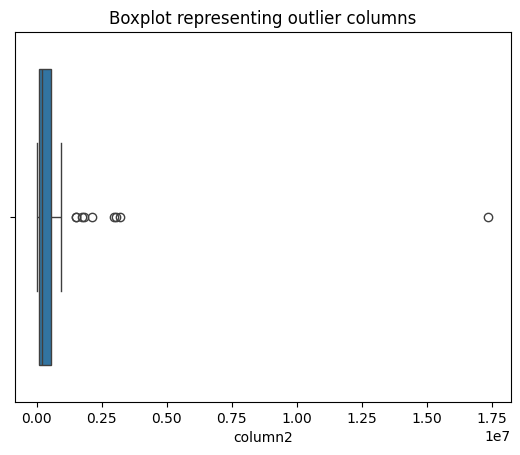

In [36]:
sns.boxplot(x=data2.column2).set_title('Boxplot representing outlier columns');

In [37]:
outlier_region = data2[data2.column2 > 10000000]

In [39]:
outlier_region

,column1,column2
51,TotalUS,1.735130e+07


In [40]:
print(outlier_region['column1'].iloc[-1], 'is outlier value')

TotalUS is outlier value


**Remove Outliers**

In [41]:
outlier_region.index

Index([51], dtype='int64')

In [42]:
data2 = data2.drop(outlier_region.index, axis=0)

In [44]:
data2.shape

(53, 2)

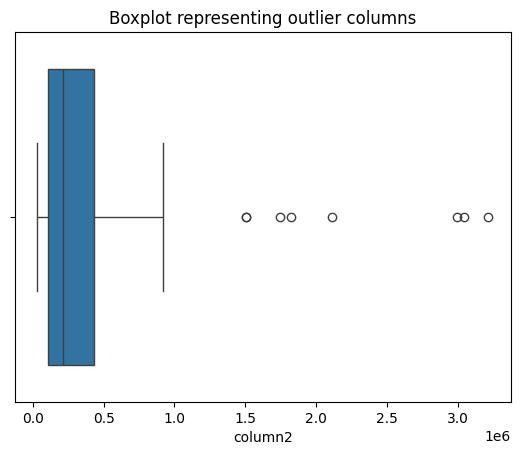

In [43]:
sns.boxplot(x=data2.column2).set_title('Boxplot representing outlier columns');

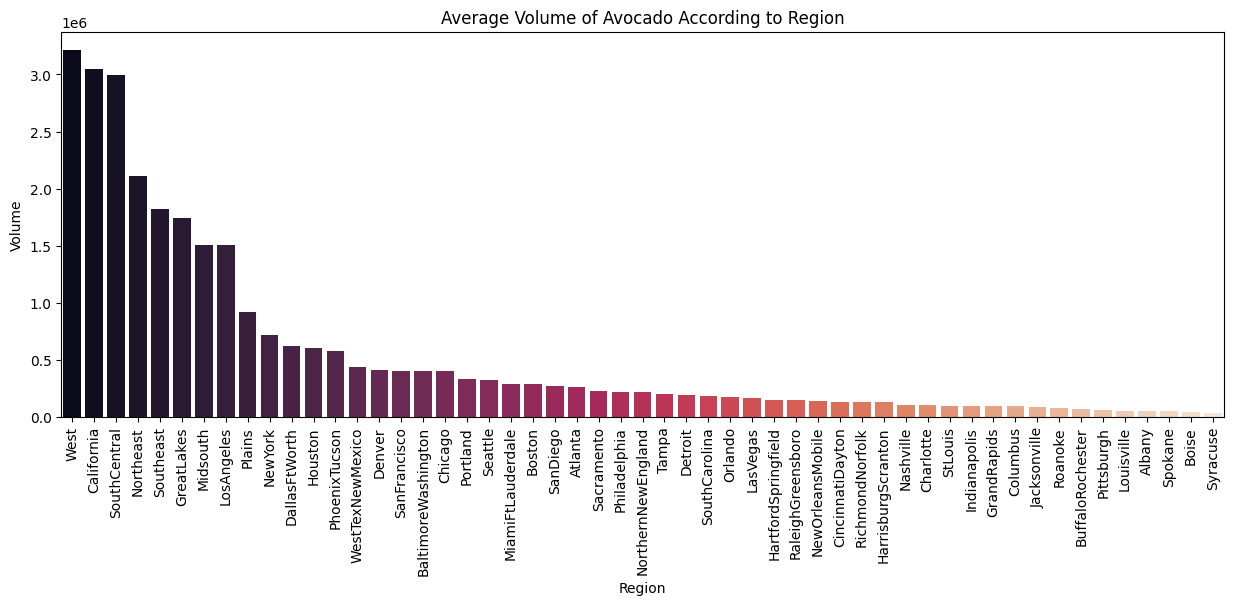

In [55]:
plot(data2,'Region','Volume')

# Q: What is the average avocado prices in each year?

In [46]:
data3 = get_avarge_between_two_columns(df, 'year', 'AveragePrice')

In [47]:
data3.shape

(4, 2)

In [48]:
data3

,column1,column2
2,2017,1.515128
0,2015,1.375590
3,2018,1.347531
1,2016,1.338640


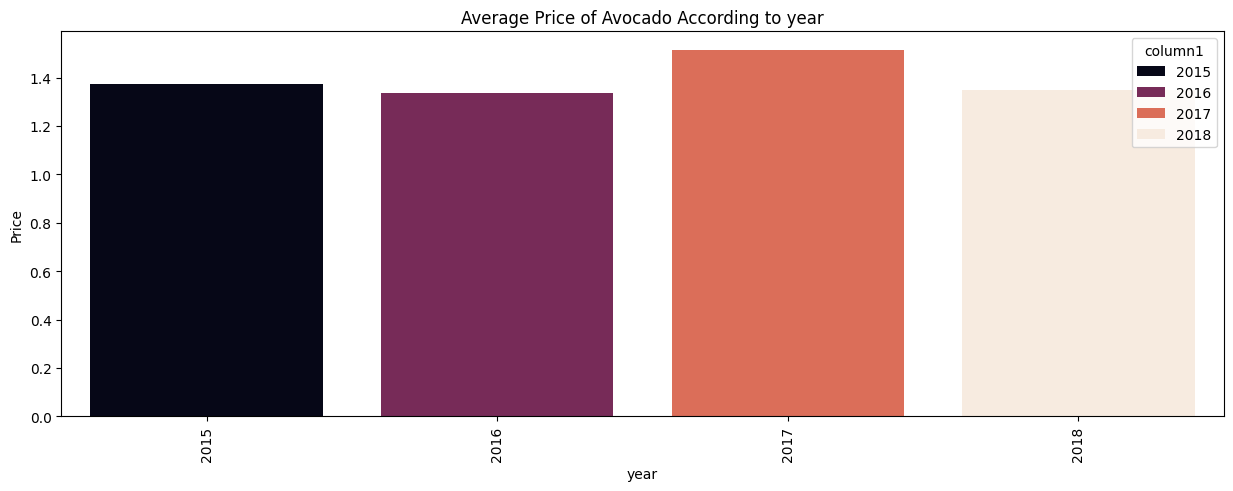

In [56]:
plot(data3, 'year', 'Price')

# Q: What is the average avocado volume in each year?

In [50]:
data4 = get_avarge_between_two_columns(df, 'year', 'Total Volume')

In [51]:
data4

,column1,column2
3,2018,1.066928e+06
2,2017,8.623393e+05
1,2016,8.584206e+05
0,2015,7.810274e+05


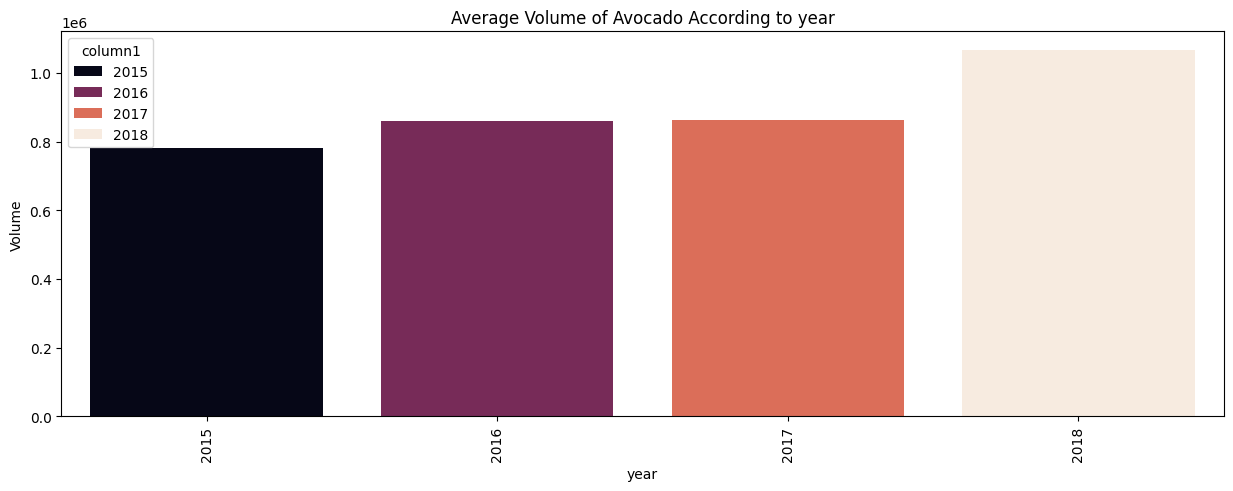

In [57]:
plot(data4, 'year', 'Volume')

# Data Modeling

## Change few column's data to category

In [80]:
df['region'].shape

(18249,)

In [81]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [85]:
df['region'].head()

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [87]:
df['region'] = df['region'].astype('category')

In [88]:
df['region'].head()

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: category
Categories (54, object): ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', ..., 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

In [89]:
df['region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: region
Non-Null Count  Dtype   
--------------  -----   
18249 non-null  category
dtypes: category(1)
memory usage: 20.4 KB


In [90]:
df['region'] = df['region'].cat.codes

In [93]:
df['region'].head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int8

In [72]:
df['region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: region
Non-Null Count  Dtype
--------------  -----
18249 non-null  int8 
dtypes: int8(1)
memory usage: 18.0 KB


In [91]:
df['region'].value_counts()

region
0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: count, dtype: int64

In [92]:
df['region'].shape

(18249,)

In [94]:
df['type'].shape

(18249,)

In [95]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [96]:
df['type'].head()

0    conventional
1    conventional
2    conventional
3    conventional
4    conventional
Name: type, dtype: object

In [97]:
df['type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: type
Non-Null Count  Dtype 
--------------  ----- 
18249 non-null  object
dtypes: object(1)
memory usage: 142.7+ KB


In [98]:
df['type'] = df['type'].astype('category')

In [99]:
df['type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: type
Non-Null Count  Dtype   
--------------  -----   
18249 non-null  category
dtypes: category(1)
memory usage: 18.1 KB


In [100]:
df['type'] = df['type'].cat.codes

In [102]:
df['type'].shape

(18249,)

In [103]:
df['type'].value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

In [104]:
df['type'].head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int8

In [105]:
df['type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18249 entries, 0 to 18248
Series name: type
Non-Null Count  Dtype
--------------  -----
18249 non-null  int8 
dtypes: int8(1)
memory usage: 18.0 KB


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [107]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


## Split data into `X` and `y`

In [108]:
X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

In [109]:
X.shape

(18249, 8)

In [110]:
X.head()

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [111]:
y.shape

(18249,)

In [112]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

## Split `X, y` into training and testing dataset

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12774, 8)
(5475, 8)
(12774,)
(5475,)


In [116]:
X_train.head()

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8884,1354912.98,426983.93,200603.91,221593.36,4786.66,0,2018,33
15036,5425.35,4930.25,948.34,3981.91,0.00,1,2017,5
2787,914966.82,99447.77,82335.29,17112.48,0.00,0,2015,53
12729,139374.22,59031.59,13790.28,45241.31,0.00,1,2016,15
11760,3590.40,1230.34,1230.34,0.00,0.00,1,2015,50


In [117]:
y_train.head()

8884     0.81
15036    2.51
2787     0.75
12729    1.47
11760    1.34
Name: AveragePrice, dtype: float64

## Bulid and Fit the Model

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict and calculate the accuracy for the testing dataset

In [120]:
test_pre = model.predict(X_test)
test_score = r2_score(y_test, test_pre)
print('The accuracy of testing dataset:', test_score*100)

The accuracy of testing dataset: 38.58074176446672


## Predict and calculate the accuracy for the training dataset

In [121]:
train_pre = model.predict(X_train)
train_score = r2_score(y_train, train_pre)
print('The accuracy of training dataset:', train_score*100)

The accuracy of training dataset: 39.706860424107504


**_This LR model doesn't work well with this avocado dataset, In order to the avocado prices were near together_**